In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import keras
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers

#np.set_printoptions(threshold=sys.maxsize)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Using TensorFlow backend.


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
raw_train_data = pd.read_csv('/kaggle/input/titanic/train.csv', sep=',').values
raw_test_data = pd.read_csv('/kaggle/input/titanic/test.csv', sep=',').values
np.random.shuffle(raw_train_data)
with open('/kaggle/input/titanic/train.csv') as f:
    first_line = f.readline()
    print(first_line)
    
print(raw_train_data[0])
print('Raw data length:' + str(len(raw_train_data)))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked

[368 1 3 'Moussa, Mrs. (Mantoura Boulos)' 'female' nan 0 0 '2626' 7.2292
 nan 'C']
Raw data length:891


In [3]:
with open('/kaggle/input/titanic/test.csv') as f:
    first_line = f.readline()
    print(first_line)
    
print(raw_test_data[0])
print('Raw test length:' + str(len(raw_test_data)))

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked

[892 3 'Kelly, Mr. James' 'male' 34.5 0 0 '330911' 7.8292 nan 'Q']
Raw test length:418


In [4]:
'''
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

0  PassengerId
1  Survived
2  Pclass
3  Name
4  Sex
5  Age
6  SibSp
7  Parch
8  Ticket
9  Fare
10 Cabin
11 Embarked
'''

train_data_x = np.zeros(shape=(len(raw_train_data),6))
train_data_y = np.zeros(shape=(len(raw_train_data)))

for i ,(raw_train_item, train_item_x) in enumerate((zip(raw_train_data, train_data_x))):    
    # PassengerId
    #
    
    # Survived
    train_data_y[i] = raw_train_item[1]
    
    # Pclass
    train_item_x[0] = raw_train_item[2]
    
    # Name
    #
    
    # Sex
    train_item_x[1] = 1 if raw_train_item[4] == 'male' else 0
    
    # Age
    train_item_x[2] = raw_train_item[5]
    
    # Number of siblings
    train_item_x[3] = raw_train_item[6]
    
    # Number of parents
    train_item_x[4] = raw_train_item[7]
    
    # Ticket
    #
    
    # Passenger fare
    train_item_x[5] = raw_train_item[9]
    
    # Cabin
    #
    
    # Embarked
    #
    
    print(raw_train_item)
    print(train_item_x)
    print(train_data_y[i])
    print('')

[368 1 3 'Moussa, Mrs. (Mantoura Boulos)' 'female' nan 0 0 '2626' 7.2292
 nan 'C']
[3.     0.        nan 0.     0.     7.2292]
1.0

[590 0 3 'Murdlin, Mr. Joseph' 'male' nan 0 0 'A./5. 3235' 8.05 nan 'S']
[3.   1.    nan 0.   0.   8.05]
0.0

[268 1 3 'Persson, Mr. Ernst Ulrik' 'male' 25.0 1 0 '347083' 7.775 nan 'S']
[ 3.     1.    25.     1.     0.     7.775]
1.0

[58 0 3 'Novel, Mr. Mansouer' 'male' 28.5 0 0 '2697' 7.2292 nan 'C']
[ 3.      1.     28.5     0.      0.      7.2292]
0.0

[166 1 3 'Goldsmith, Master. Frank John William "Frankie"' 'male' 9.0 0 2
 '363291' 20.525 nan 'S']
[ 3.     1.     9.     0.     2.    20.525]
1.0

[94 0 3 'Dean, Mr. Bertram Frank' 'male' 26.0 1 2 'C.A. 2315' 20.575 nan
 'S']
[ 3.     1.    26.     1.     2.    20.575]
0.0

[480 1 3 'Hirvonen, Miss. Hildur E' 'female' 2.0 0 1 '3101298' 12.2875 nan
 'S']
[ 3.      0.      2.      0.      1.     12.2875]
1.0

[176 0 3 'Klasen, Mr. Klas Albin' 'male' 18.0 1 1 '350404' 7.8542 nan 'S']
[ 3.      1.     18. 

In [5]:
'''
0 PassengerId
1 Pclass
2 Name
3 Sex
4 Age
5 SibSp
6 Parch
7 Ticket
8 Fare
9 Cabin
10 Embarked
'''

test_data_x = np.zeros(shape=(len(raw_train_data),6))

for i ,(raw_test_item, test_item_x) in enumerate((zip(raw_test_data, test_data_x))):    
    # PassengerId
    #
    
    # Pclass
    test_item_x[0] = raw_test_item[1]
    
    # Name
    #
    
    # Sex
    test_item_x[1] = 1 if raw_test_item[3] == 'male' else 0
    
    # Age
    test_item_x[2] = raw_test_item[4]
    
    # Number of siblings
    test_item_x[3] = raw_test_item[5]
    
    # Number of parents
    test_item_x[4] = raw_test_item[6]
    
    # Ticket
    #
    
    # Passenger fare
    test_item_x[5] = raw_test_item[8]
    
    # Cabin
    #
    
    # Embarked
    #
    
    print(raw_test_item)
    print(test_item_x)
    print('')

[892 3 'Kelly, Mr. James' 'male' 34.5 0 0 '330911' 7.8292 nan 'Q']
[ 3.      1.     34.5     0.      0.      7.8292]

[893 3 'Wilkes, Mrs. James (Ellen Needs)' 'female' 47.0 1 0 '363272' 7.0
 nan 'S']
[ 3.  0. 47.  1.  0.  7.]

[894 2 'Myles, Mr. Thomas Francis' 'male' 62.0 0 0 '240276' 9.6875 nan 'Q']
[ 2.      1.     62.      0.      0.      9.6875]

[895 3 'Wirz, Mr. Albert' 'male' 27.0 0 0 '315154' 8.6625 nan 'S']
[ 3.      1.     27.      0.      0.      8.6625]

[896 3 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)' 'female' 22.0 1 1
 '3101298' 12.2875 nan 'S']
[ 3.      0.     22.      1.      1.     12.2875]

[897 3 'Svensson, Mr. Johan Cervin' 'male' 14.0 0 0 '7538' 9.225 nan 'S']
[ 3.     1.    14.     0.     0.     9.225]

[898 3 'Connolly, Miss. Kate' 'female' 30.0 0 0 '330972' 7.6292 nan 'Q']
[ 3.      0.     30.      0.      0.      7.6292]

[899 2 'Caldwell, Mr. Albert Francis' 'male' 26.0 1 1 '248738' 29.0 nan
 'S']
[ 2.  1. 26.  1.  1. 29.]

[900 3 'Abrahim, Mrs. Joseph

In [6]:
for axis in train_data_x:
    where_are_NaNs = np.isnan(axis)
    axis[where_are_NaNs] = 0

# Good explanation why z-score is nice.
# https://www.codecademy.com/articles/normalization
#print(train_data_x)
mean = train_data_x.mean(axis=0)
train_data_x -= mean
#print(train_data_x)
std = train_data_x.std(axis=0) 
train_data_x /= std

train_data_x_wo_val = train_data_x[:-100]
train_data_x_val =train_data_x[len(train_data_x)-100:]

# TODO: What about validation data? Based on the book, validation data exists out of the train_data after normalization.
print(len(train_data_x))
print(len(train_data_x_wo_val))
print(len(train_data_x_val))
print(train_data_x)
print(train_data_x_wo_val)
print(train_data_x_val)

891
791
100
[[ 0.82737724 -1.35557354 -1.35329389 -0.4745452  -0.47367361 -0.50286397]
 [ 0.82737724  0.73769513 -1.35329389 -0.4745452  -0.47367361 -0.48633742]
 [ 0.82737724  0.73769513  0.06827554  0.43279337 -0.47367361 -0.49187446]
 ...
 [ 0.82737724  0.73769513 -0.01701863 -0.4745452  -0.47367361 -0.50286397]
 [ 0.82737724 -1.35557354 -0.10231279 -0.4745452  -0.47367361 -0.50244517]
 [ 0.82737724  0.73769513 -0.15917557 -0.4745452  -0.47367361 -0.49271408]]
[[ 0.82737724 -1.35557354 -1.35329389 -0.4745452  -0.47367361 -0.50286397]
 [ 0.82737724  0.73769513 -1.35329389 -0.4745452  -0.47367361 -0.48633742]
 [ 0.82737724  0.73769513  0.06827554  0.43279337 -0.47367361 -0.49187446]
 ...
 [ 0.82737724 -1.35557354 -1.35329389  0.43279337  2.00893337 -0.17626324]
 [-1.56610693  0.73769513 -1.35329389 -0.4745452  -0.47367361  0.0562924 ]
 [ 0.82737724  0.73769513  0.63690331 -0.4745452  -0.47367361 -0.48633742]]
[[ 0.82737724  0.73769513 -0.44348946  0.43279337  0.76762988 -0.24069424]
 

In [7]:
train_data_y_wo_val = train_data_y[:-100]
train_data_y_val =train_data_y[len(train_data_y)-100:]

# TODO: What about validation data? Based on the book, validation data exists out of the train_data after normalization.
print(len(train_data_y))
print(len(train_data_y_wo_val))
print(len(train_data_y_val))
print(train_data_y)
print(train_data_y_wo_val)
print(train_data_y_val)

891
791
100
[1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.

In [8]:
for axis in test_data_x:
    where_are_NaNs = np.isnan(axis)
    axis[where_are_NaNs] = 0
    
# Keep in mind normalization of test_data is done with mean and std of train_data.
test_data_x -= mean
test_data_x /= std
print(test_data_x)


[[ 0.82737724  0.73769513  0.60847192 -0.4745452  -0.47367361 -0.49078316]
 [ 0.82737724 -1.35557354  1.31925664  0.43279337 -0.47367361 -0.50747884]
 [-0.36936484  0.73769513  2.1721983  -0.4745452  -0.47367361 -0.45336687]
 ...
 [-2.76284901 -1.35557354 -1.35329389 -0.4745452  -0.47367361 -0.64842165]
 [-2.76284901 -1.35557354 -1.35329389 -0.4745452  -0.47367361 -0.64842165]
 [-2.76284901 -1.35557354 -1.35329389 -0.4745452  -0.47367361 -0.64842165]]


In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(len(train_data_x[0]),)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])


In [10]:
history = model.fit(train_data_x_wo_val, train_data_y_wo_val,validation_data=(train_data_x_val, train_data_y_val),epochs=500, batch_size=1)

Train on 791 samples, validate on 100 samples
Epoch 1/500
791/791 [==============================] - 1s 2ms/step - loss: 0.5604 - accuracy: 0.7244 - val_loss: 0.5702 - val_accuracy: 0.7700
Epoch 2/500
791/791 [==============================] - 1s 1ms/step - loss: 0.4519 - accuracy: 0.8053 - val_loss: 0.5970 - val_accuracy: 0.7600
Epoch 3/500
791/791 [==============================] - 1s 1ms/step - loss: 0.4432 - accuracy: 0.8129 - val_loss: 0.5796 - val_accuracy: 0.7600
Epoch 4/500
791/791 [==============================] - 1s 1ms/step - loss: 0.4320 - accuracy: 0.8142 - val_loss: 0.5921 - val_accuracy: 0.7800
Epoch 5/500
791/791 [==============================] - 1s 1ms/step - loss: 0.4233 - accuracy: 0.8104 - val_loss: 0.6155 - val_accuracy: 0.7600
Epoch 6/500
791/791 [==============================] - 1s 1ms/step - loss: 0.4199 - accuracy: 0.8192 - val_loss: 0.6226 - val_accuracy: 0.7700
Epoch 7/500
791/791 [==============================] - 1s 1ms/step - loss: 0.4153 - accuracy: 0.

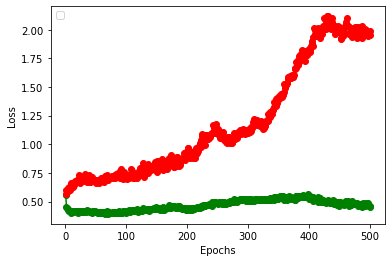

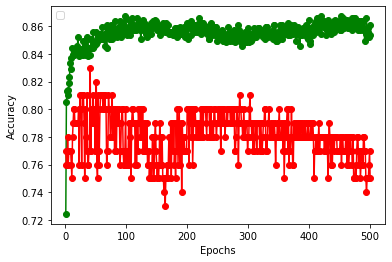

In [11]:
loss_history = history.history['loss']
plt.plot(range(1, len(loss_history) + 1), loss_history, 'g-o') 

val_loss_history = history.history['val_loss']
plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, 'r-o') 

plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

accuracy_history = history.history['accuracy']
plt.plot(range(1, len(accuracy_history) + 1), accuracy_history, 'g-o') 


val_accuracy_history = history.history['val_accuracy']
plt.plot(range(1, len(val_accuracy_history) + 1), val_accuracy_history, 'r-o') 

plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()